## Installing Dependencies

In [31]:
!pip3 install python-binance


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Data processing

In [12]:
from binance.client import Client

client = Client()

klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1HOUR, "1 months ago UTC")

In [26]:
import pandas as pd
import pandas_ta as ta

df = pd.DataFrame(klines, 
                 columns = ["open_time","open","high","low","close","vol","close_time","quote_vol",\
                            "trades","taker_base_vol","taker_quote_vol","ignore"])

df = df[["open_time","open","high","low","close"]]

df["open_time"] = pd.to_datetime(df["open_time"], unit = "ms")

df["open"] = df.open.astype(float)
df["high"] = df.high.astype(float)
df["low"] = df.low.astype(float)
df["close"] = df.close.astype(float)

df["atr"] = ta.atr(high=df.high, low=df.low, close=df.close)
df["atr"] = df.atr.rolling(window=30).mean()


df.set_index("open_time", inplace = True)

df

,open,high,low,close,atr
open_time,,,,,
2024-07-22 08:00:00,67236.01,67399.98,67030.00,67080.48,NaN
2024-07-22 09:00:00,67080.48,67427.22,66944.10,67427.22,NaN
2024-07-22 10:00:00,67427.22,67524.00,67293.53,67422.01,NaN
2024-07-22 11:00:00,67422.01,67599.00,67288.00,67516.01,NaN
2024-07-22 12:00:00,67516.01,67697.11,67366.02,67697.11,NaN
...,...,...,...,...,...
2024-08-22 03:00:00,60186.49,60624.00,60074.00,60548.90,467.796782
2024-08-22 04:00:00,60548.90,60850.00,60459.98,60834.52,470.619226
2024-08-22 05:00:00,60834.53,60834.53,60602.45,60724.00,472.816853


## Plotting Graph

In [64]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from IPython import display
from IPython.display import HTML
pd.set_option('mode.chained_assignment', None)

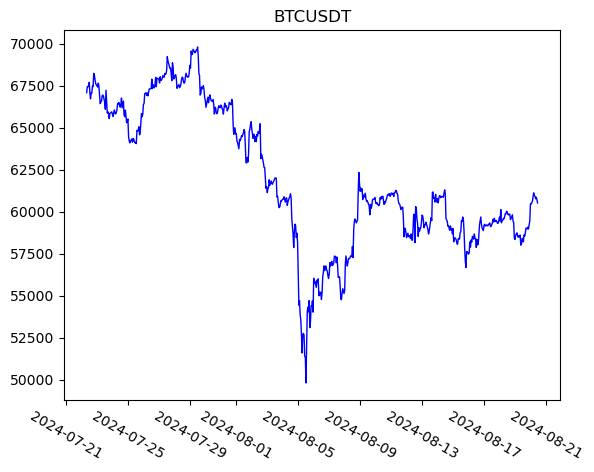

In [100]:
df2 = df.iloc[0:700]

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2.close, c='blue', lw=1, zorder=5)
plt.title('BTCUSDT')

plt.show()

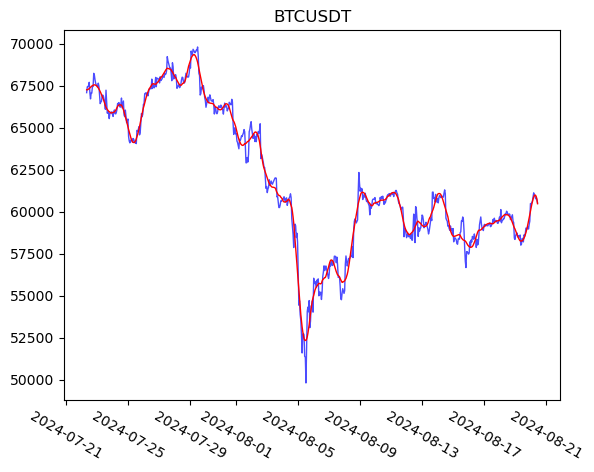

In [102]:
df2 = df.iloc[0:700]

df2["close_smooth"] = savgol_filter(df2.close, 49, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2.close, c='blue', lw=1, alpha=0.7, zorder=5)
price_smooth, = ax.plot(df2.index, df2.close_smooth, c='red', lw=1, zorder=5)
plt.title('BTCUSDT')

plt.show()

## Detecting Extrema

peaks: [ 51 125 166 262 379 427 476 546 652 695]
troughs: [ 38  73 146 242 339 396 442 500 595 674]


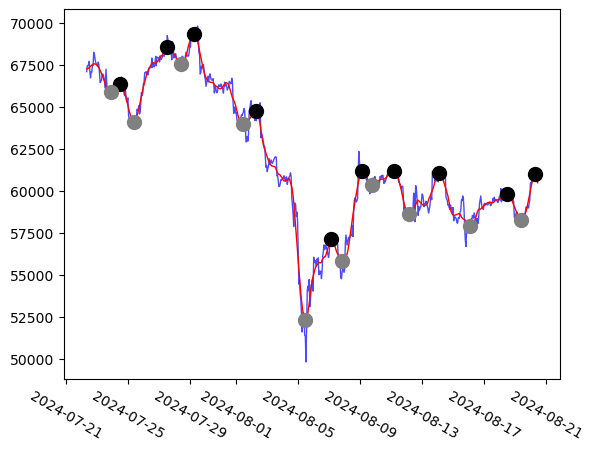

In [199]:
df2 = df.iloc[0:700]

df2["close_smooth"] = savgol_filter(df2.close, 49, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2.close, c='blue', lw=1, alpha=0.7, zorder=5)
price_smooth, = ax.plot(df2.index, df2.close_smooth, c='red', lw=1, zorder=5)

atr = df2.atr.iloc[-1]

peaks_idx, _ = find_peaks(df2.close_smooth, distance = 20, 
        width = 3, prominence=atr)

print('peaks:', peaks_idx)
print('troughs:', troughs_idx)

troughs_idx, _ = find_peaks(-1*df2.close_smooth, distance = 15, 
        width = 3, prominence=atr)

peaks, = ax.plot(df2.index[peaks_idx], df2.close_smooth.iloc[peaks_idx], \
                 c="black", linestyle='None', markersize = 10.0, marker = "o", zorder=10)

troughs, = ax.plot(df2.index[troughs_idx], df2.close_smooth.iloc[troughs_idx], \
                   c="gray", linestyle='None', markersize = 10.0, marker = "o", zorder=10)

plt.show()

## Detecting Uptrend

peaks: [ 51 125 166 262 379 427 476 546 652 695]
troughs: [ 38  73 146 242 339 396 442 500 595 674]


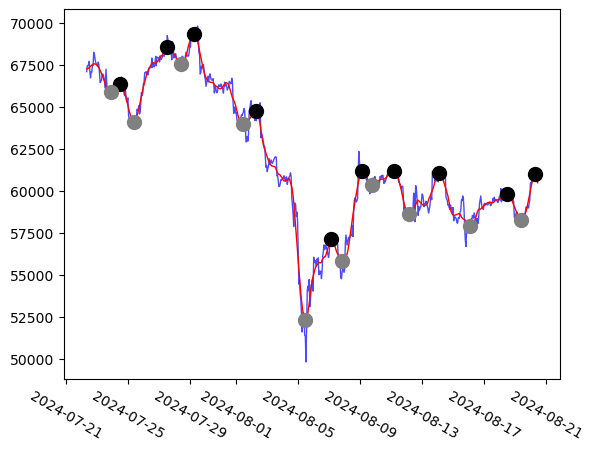

In [201]:
df2 = df.iloc[0:700]

df2["close_smooth"] = savgol_filter(df2.close, 49, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2.close, c='blue', lw=1, alpha=0.7, zorder=5)
price_smooth, = ax.plot(df2.index, df2.close_smooth, c='red', lw=1, zorder=5)

atr = df2.atr.iloc[-1]

peaks_idx, _ = find_peaks(df2.close_smooth, distance = 20, 
        width = 3, prominence=atr)

print('peaks:', peaks_idx)
print('troughs:', troughs_idx)

troughs_idx, _ = find_peaks(-1*df2.close_smooth, distance = 15, 
        width = 3, prominence=atr)

peaks_line, = ax.plot(df2.index[peaks_idx], df2.close_smooth.iloc[peaks_idx], \
                 c="black", linestyle='None', markersize = 10.0, marker = "o", zorder=10)

troughs_line, = ax.plot(df2.index[troughs_idx], df2.close_smooth.iloc[troughs_idx], \
                   c="gray", linestyle='None', markersize = 10.0, marker = "o", zorder=10)

# up_run_length = 0
# up_run = True
# while up_run:
#     if 2 + up_run_length > len(peaks_idx) or 2 + up_run_length > len(troughs_idx):
#         break
#     if df2.close_smooth.iloc[peaks_idx[-1 - up_run_length]] > df2.close_smooth.iloc[peaks_idx[-2 - up_run_length]] and \
#        df2.close_smooth.iloc[troughs_idx[-1 - up_run_length]] > df2.close_smooth.iloc[troughs_idx[-2 - up_run_length]]:
#         up_run_length += 1
#     else:
#         up_run = False

# if up_run_length > 0:
#     ax.set_facecolor(('yellow', 0.3))
# else:
#     ax.set_facecolor("white")
        
# print(up_run_length)

if(peaks_idx[-1] < troughs_idx[-1]):
    ax.set_facecolor(('yellow', 0.3))
else:
    ax.set_facecolor("white")

## Creating Animation